In [1]:
import sys
sys.path.append('../../src/models')
sys.path.append('../../src/visualization')

from segmentation import SegmentationModel as Model
from visualize_segmentation import overlay_mask

/opt/conda/envs/py3.6/lib/python3.6/site-packages/cupy/core/fusion.py:659: FutureWarning: cupy.core.fusion is experimental. The interface can change in the future.
  util.experimental('cupy.core.fusion')


In [2]:
from os import path
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load trained model
# Modify the the paths based on your trained model location if needed.
mean = np.load("../../data/dataSplit/mean.npy")
model = Model("../../models/logs/model_iter_14878", mean)

In [4]:
# Load test-set
# Modify the the paths based on your data location if needed.
with open( "../../data/dataSplit/test.txt") as f:
    lines = f.readlines()

test_set = []
for line in lines:
    line = line.rstrip()
    test_set.append(line)

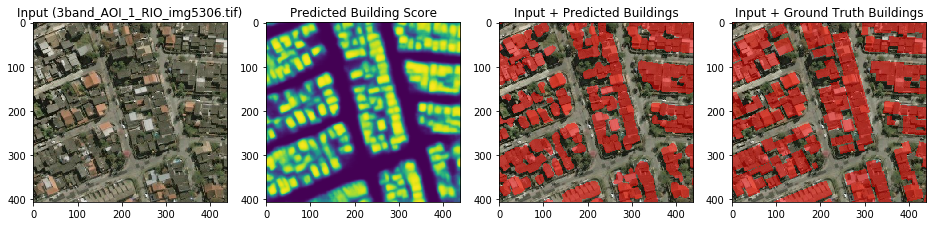

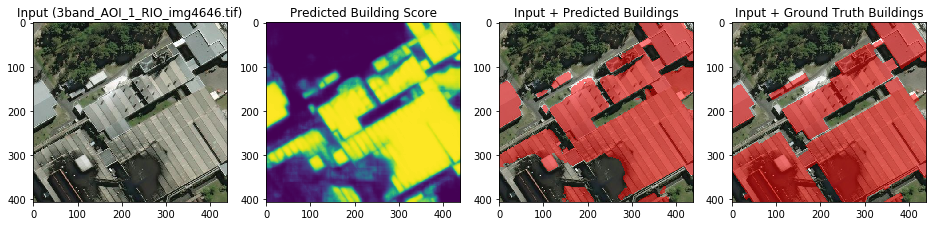

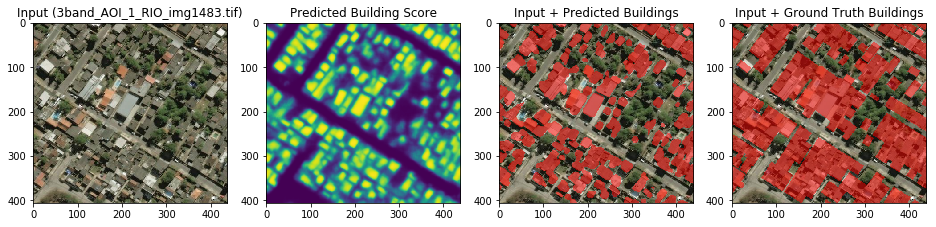

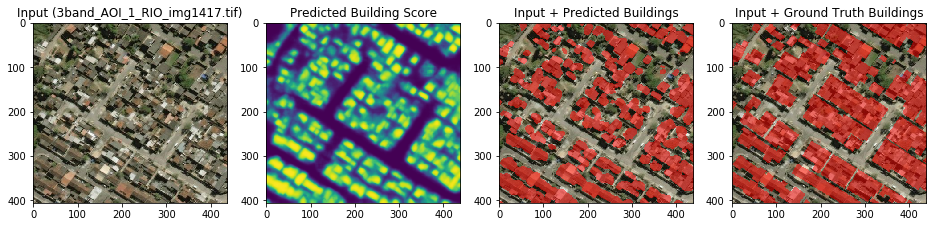

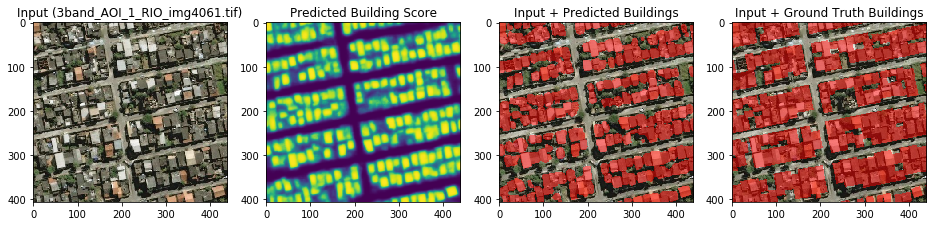

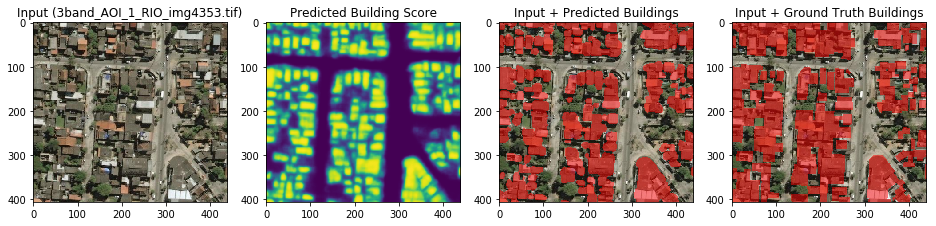

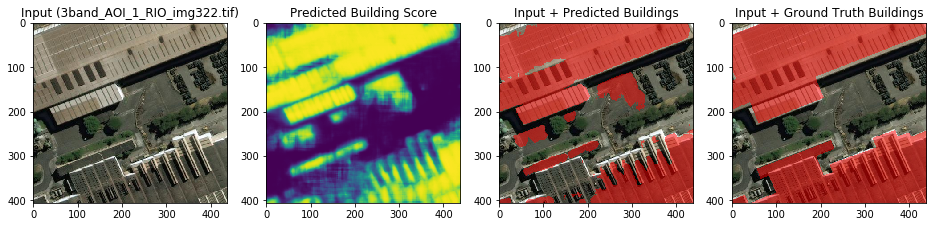

Finishd.


In [5]:
# Apply segmentation and show the results together with ground-truth building masks!

def plot_results(test_data, image, score, label, figsize=(4,4)):
    
    building_score = score[1]
    
    building_mask_pred = (np.argmax(score, axis=0) == 1)
    building_overlay_pred = overlay_mask(image, building_mask_pred)
    
    building_mask_gt = (label > 0)
    building_overlay_gt = overlay_mask(image, building_mask_gt)
    
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(4*figsize[0], figsize[1]))
    
    ax0.imshow(image)
    ax0.set_title('Input ({})'.format(test_data)) 
    
    ax1.imshow(building_score, vmin=0.0, vmax=1.0)
    ax1.set_title('Predicted Building Score') 
    
    ax2.imshow(building_overlay_pred)
    ax2.set_title('Input + Predicted Buildings') 
    
    ax3.imshow(building_overlay_gt)
    ax3.set_title('Input + Ground Truth Buildings') 
    
    plt.show()
    

# Modify the the paths based on your raster image and building label location.
image_dir = '../../data/processedBuildingLabels/3band'
label_dir = '../../data/buildingLabelImages'

for test_data in test_set:
    image_path = path.join(image_dir, test_data)
    label_path = path.join(label_dir, test_data)
    
    image = np.array(Image.open(image_path))
    label = np.array(Image.open(label_path))
    
    # To save time, apply segmentation to the images with above a certain amount of buildings
    area_ratio_thresh = 0.5
    building_area = float(np.sum(label > 0))
    total_area = float(label.shape[0] * label.shape[1])
    if building_area / total_area < area_ratio_thresh:
        continue
    
    score = model.apply_segmentation(image)
    
    plot_results(test_data, image, score, label)

print("Finishd.")